# Tarea. Optimización de funciones escalares

In [3]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

1. Encuntre el punto crítico de cada $f(x)$, grafique y diga si éste es máximo o mínimo:

1.1 $f(x)=x+\frac{1}{x^2}$

In [4]:
sym.var('x', real = 'true')
def f(x):
    return x + 1/x**2
f(x)

x + x**(-2)

In [5]:
df = sym.diff(f(x),x)
cf = sym.solve(df,x)
df

1 - 2/x**3

In [6]:
cf

[2**(1/3)]

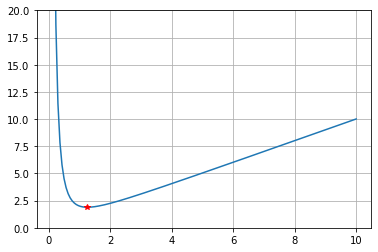

In [7]:
xfnum = np.linspace(0.1,10,150)
yfnum = f(xfnum)
plt.plot(xfnum,yfnum)
plt.plot(cf[0],f(cf[0]),'r*')
plt.ylim([0,20])
plt.grid()

In [8]:
f(cf[0])

3*2**(1/3)/2

**El punto crítico es un mínimo local y se encuentra en $(\sqrt[3]{2}, \dfrac{3\sqrt[3]{2}}{2})$**

---

1.2 $g(x)=\frac{15x}{2}\sqrt{\frac{x}{x-30}}$

In [9]:
def g(x):
    return ((15*x)/2)*(x/(x-30))**0.5
g(x)

15*x*(x/(x - 30))**0.5/2

In [10]:
dg = sym.diff(g(x),x)
cg = sym.solve(dg,x)
dg

15*(x/(x - 30))**0.5*(x - 30)*(-0.5*x/(x - 30)**2 + 0.5/(x - 30))/2 + 15*(x/(x - 30))**0.5/2

In [11]:
cg

[0.0, 45.0000000000000]

**Existen dos puntos críticos**

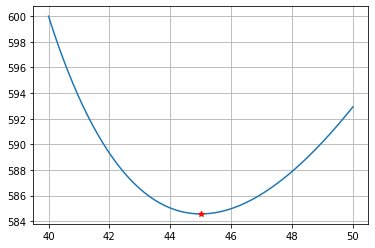

In [34]:
x1gnum = np.linspace(40,50,250)
y1gnum = g(x1gnum)
plt.plot(x1gnum,y1gnum)
plt.plot(cg[1],g(cg[1]),'r*')
plt.grid()

In [35]:
g(cg[1])

584.567147554496

**Un punto crítico es un mínimo local y se localiza en (45, 584.567)**

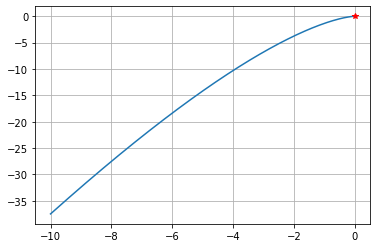

In [36]:
xgnum = np.linspace(-10,0,250)
ygnum = g(xgnum)
plt.plot(xgnum,ygnum)
plt.plot(cg[0],g(cg[0]),'r*')
plt.grid()

In [37]:
g(cg[0])

0

**El segundo punto crítico es un máximo local y se encuentra en (0, 0)**

---

1.3 $h(x)=100(1+\cos(x)\sin(x))$, para $x\in[0.\frac{\pi}{2}]$

In [13]:
def h(x):
    return 100*(1+sym.cos(x)*sym.sin(x))
h(x)

100*sin(x)*cos(x) + 100

In [14]:
dh = sym.diff(h(x),x)
ch = sym.solve(dh,x)
dh

-100*sin(x)**2 + 100*cos(x)**2

In [15]:
ch

[-pi/4, pi/4]

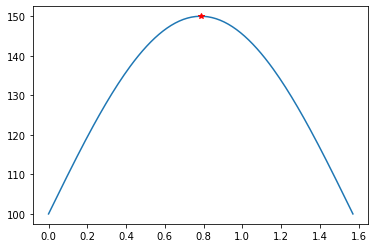

In [17]:
fn = sym.lambdify(x,h(x),'numpy')
xhnum = np.linspace(0,np.pi/2,150)
yhnum = fn(xhnum)
plt.plot(xhnum,yhnum)
plt.plot(ch[1],fn(float(ch[1])), 'r*')

In [18]:
fn(np.pi/4)

150.0

**El punto crítico es un máximo local y se encuentra en ($\dfrac{\pi}{4}$, 150)**

2. Resuelva los siguientes problemas:

2.1  Se desea hacer una caja con tapa cuyo volumen sea de 72 $cm^3$. Además, lo largo de la base debe ser el doble de lo ancho. ¿Cuáles deben ser las dimensiones de modo que la superficie de la caja sea mínima? y, ¿cuál la superficie mínima?


Se denominara $a$ al ancho de la caja, $l$ a lo largo y $h$ a la altura.

Por el contexto del problema sabemos que el largo de la base es el doble del ancho, por lo tanto $l = 2a$

El volumen de la caja se calcula $V = 72 = l\times a\times h$
El área será determinada de la siguiente manera $$A = 2(l\times a) + 2(l\times h) + 2(h\times a) $$

Si sustituimos $l$ en las dos ecuaciones nos quedaría que:

$$V = 72 = 2a\times a\times h = 2a^2 \times h $$

$$A = 2(2a\times a) + 2(2a\times h) + 2(h\times a) = 2(2a^2) + 2(2a\times h) + 2(h\times a)$$

Si despejamos $h$ de la ecuación de volumen, nos queda que 
$$h = \dfrac{72}{2a^2} = \dfrac{36}{a^2}$$

Si sustituiimos $h$ en la ecuación del área y nos queda como:
$$A = 2(2a^2) + 2(2a\times \dfrac{36}{a^2}) + 2(\dfrac{36}{a^2}\times a) = 2(2a^2) + 2(2\times \dfrac{36}{a}) + 2(\dfrac{36}{a})$$

Haciendo un poco de álgebra

$$A = 4a^2 + 4\times \dfrac{36}{a} + \dfrac{72}{a} = 4(a^2 + \dfrac{36}{a} + \dfrac{18}{a}) = 4(a^2 + \dfrac{54}{a})$$


In [27]:
sym.var('a')
def A(a):
    return 4*((a**2) + (54/a))
A(a)

4*a**2 + 216/a

In [28]:
dA = sym.diff(A(a),a)
ca = sym.solve(dA,a)
dA

8*a - 216/a**2

In [29]:
ca

[3, -3/2 - 3*sqrt(3)*I/2, -3/2 + 3*sqrt(3)*I/2]

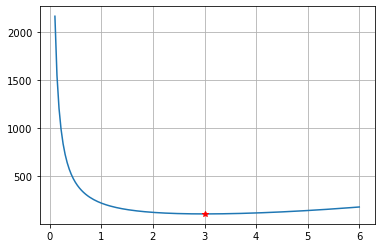

In [32]:
anum = np.linspace(0.1,6,150)
Anum = A(anum)
plt.plot(anum,Anum)
plt.plot(ca[0],A(ca[0]),'r*')
plt.grid()

In [33]:
A(ca[0])

108

Para obtener una superficie mínima de $108 cm^2$, es necesario tener un ancho $a = 3cm$; 

un largo $l = 2a = 2\times3 = 6cm$;

y un alto $h = \dfrac{36}{a^2} = \dfrac{36}{3^2} = \dfrac{36}{9} = 4cm $

---

2.2 Una bodega de 5 $m$ de largo, 4 $m$ de ancho y 3 $m$ de alto, tiene un contacto en una esquina a 80 $cm$ de alto. Si se requiere colocar un foco en el techo justo en la esquina opuesta, ¿cuál es la distancia sobre las paredes de la bodega que se debe seguir para ahorrar cable eléctrico?

Pista: Encuentre el punto P en la imágen.

![](.\Tarea_OptEsc_2.2.PNG)


**En un triángulo rectangulo, la hipotenusa siempre será el camino más corto, por lo tanto se dividirá en dos partes **

$d_1$ será la distancia del contacto a un punto P situado en el en la parte opuesta a lo largo de la bodega, por lo tanto
$$
d_1 = \sqrt{5^2 + x^2}
$$

Ahora $d_2$ será la distancia de ese punto P al foco, entonces 

$$
d_2 = \sqrt{4^2 + (3-(0.8+x))^2}
$$

La suma de estas dos distancias nos debe dar la distancia total, la cual es la que se desea minimizar, por lo tanto 
$$
D = d_1 + d_2
$$

$$
D = \sqrt{5^2 + x^2} + \sqrt{4^2 + (3-(0.8+x))^2}
$$

In [6]:
sym.var('x')
def D(x):
    return (((5**2) + (x**2))**0.5) + ((((4**2)+(3-(0.8+x))**2))**0.5)
D(x)

(x**2 + 25)**0.5 + 4.0*(0.3025*(1 - 0.454545454545455*x)**2 + 1)**0.5

In [43]:
dD = sym.diff(D(x),x)
cD = sym.solve(dD,x)
dD

1.0*x/(x**2 + 25)**0.5 + 4.0*(0.0625*x - 0.1375)/(0.3025*(1 - 0.454545454545455*x)**2 + 1)**0.5

In [44]:
cD

[1.22222222222222]

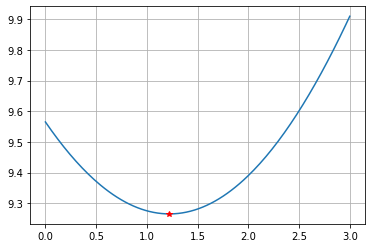

In [45]:
dnum = np.linspace(0,3,150)
Dnum = D(dnum)
plt.plot(dnum,Dnum)
plt.plot(cD[0],D(cD[0]),'r*')
plt.grid()

In [47]:
D(cD[0])

9.26498785752037

La menor distancia posible es de $9.265 m$, esto se obtiene sí, como se mencionó anteriormente se realizan triangulos rectángulos para recorrer menor distancia mediante la hipotenusa de éste. 

$x$ la cual es nuestra altura del enchufe hasta el punto p debe de ser de $1.2222 m$ para obtener esta distancia mínima

---

2.3 Un barco encalló a $9 km$ del punto **P** más próximo de una costa en línea recta. Se necesita enviar a un mensajero a un pueblo situado en la orilla de la costa a 15 km de **P**. Teniendo en cuenta que el mensajero recorre a pie $5 km/h$, y en una barca a $4 km/h$, decir en qué punto de la orilla debe desembarcar para llegar al pueblo lo más pronto posible?

![](./Tarea_OptEsc_2.3.PNG)

**De la misma manera que el ejercicio pasado, dividiremos nuestra distancia a recorrer mediante triángulos rectangulos**

Si usamos la variable $y$ para determinar un supuesto camino en barca, mediante el Teorema de Pitágoras, tenemos que
$$
y = \sqrt{9^2 + (15-x)^2}
$$
Se usará la variable $x$ para un supuesto recorrido caminando

Se sabe que $t = \dfrac{d}{v}$

Por lo tanto,
$$
T = \dfrac{x}{5} + \dfrac{y}{4}
$$
Al sustituir $y$ en nuestra ecuación del tiempo, nos queda que

$$
T = \dfrac{x}{5} + \dfrac{\sqrt{9^2 + (15-x)^2}}{4}
$$

**Esta última ecuación es la que se desea minimizar**

In [7]:
def T(x):
    return (x/5) + ((((9**2)+(15-x)**2)**0.5)/4)
T(x)

x/5 + ((15 - x)**2 + 81)**0.5/4

In [8]:
dT = sym.diff(T(x),x)
cT = sym.solve(dT,x)
dT

(1.0*x - 15.0)/(4*((15 - x)**2 + 81)**0.5) + 1/5

In [9]:
cT

[3.00000000000000]

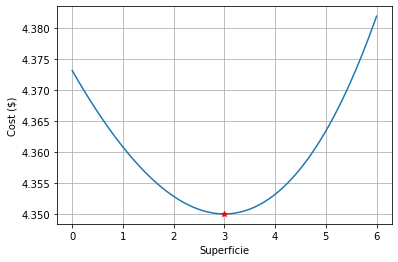

In [10]:
xnum = np.linspace(0,6,150)
Tnum = T(xnum)
plt.plot(xnum,Tnum)
plt.plot(cT[0],T(cT[0]),'r*')
plt.xlabel('Superficie')
plt.ylabel('Cost ($)')
plt.grid()

In [57]:
T(cT[0])

4.35000000000000

Se concluye que para realizar el menor tiempo posible, es necesario que la persona desembarque $3 m$ antes de llegar al pueblo, para que así *reme* $15m$ y *camine* sólo $3m$. Con esto, tendremos un tiempo mínimo de $4.35 horas$